In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

import numpy as np
np.set_printoptions(linewidth=110)

<font color='red'> <center>
# Machine Learning: Unsupervised learning 
# (Part I)


### Why studying clustering? ###

**Use and applications:** 
This task has many applications in different domains:

+ Categorize **documents** of similar topics.
+ Group **individuals** that have similar political view.
+ **Social network** analysis.
+ **Market segmentation**/ building customer profiles for market analysis.
+ Detection of **near duplicates**.
+ Group **genes** that perform the same function.
+ **Astronomical** data analysis.
+ **Compression**.


<center><img src="images/facebook.png"></center>
<center><tiny>Facebook networks.</small></center>


## INDEX:##

1. **Introduction to unsupervised learning**

2. Clustering

 2.1 Important questions in clustering

 2.2 Similarity and distance

 2.3 Quality evaluation
 
3. Taxonomy of clustering
3.1 Clustering techniques - k-means

3.2 Hierarchical clustering

3.3 Spectral clustering

3.4 Comparing different clustering algorithms on toy datasets
 
4. CASE STUDY: EUROSTAT data

4.1 Applying K-means to the case study

4.2 Applying hierarchical clustering 

5. Dimensionality reduction by principal component analysis

6. Examples

In [2]:
from IPython.display import HTML

HTML('http://blog.stephenwolfram.com/2013/04/data-science-of-the-facebook-world/')

# 1. Introduction to unsupervised learning

In machine learning, the problem of unsupervised learning is that of trying to **find hidden structure in unlabeled data**. Since the examples given to the learner are unlabeled, there is **no error or reward signal** to evaluate a potential solution. This distinguishes unsupervised learning from supervised learning. 

Unsupervised learning is defined as the set of algorithms which learns from a **training set of unlableled or unannotated** examples, using the features of the inputs to categorize them together according to some **geometric** or **statistical** criteria. 

<center><img src="images/clustering of genes.gif">
</center>
<center><small>(a) The data set contains four clusters of different sizes, shapes and numbers of genes. Left: each dot represents a gene, plotted against its expression value under the two experimental conditions. Euclidean distance, which corresponds to the straight-line distance between points in this graph, was used for clustering. Right: the standard red-green representation of the data and corresponding cluster identities. (b) Hierarchical clustering finds an entire hierarchy of clusters. The tree was cut at the level indicated to yield four clusters. Some of the superclusters and subclusters are illustrated on the left. (c) k-means (with k = 4) partitions the space into four subspaces, depending on which of the four cluster centroids (stars) is closest. (d) SOM finds clusters, which are organized into a grid structure (in this case a simple 2 times 2 grid).

From the following article:
How does gene expression clustering work?
Patrik D'haeseleer, [Nature Biotechnology 23, 1499 - 1501 (2005)](http://www.nature.com/nbt/journal/v23/n12/fig_tab/nbt1205-1499_F1.html)
doi:10.1038/nbt1205-1499
        </small></center>

Unsupervised learning encompasses many techniques that seek to **summarize and explain key features** of the data. Many methods employed in unsupervised learning are based on *data mining* methods used to preprocess data.

Different *kinds* of unsupervised learning problems:

+ *Clustering:* partition examples into groups when no pre-defined categories/classes are available.
+ *Dimensionality reduction:* principal component analysis, independent component analysis, non-negative matrix factorization.
+ *Outlier detection:* find unusual events (e.g. malfunction).
+ *Novelty detection:* find changes in data.

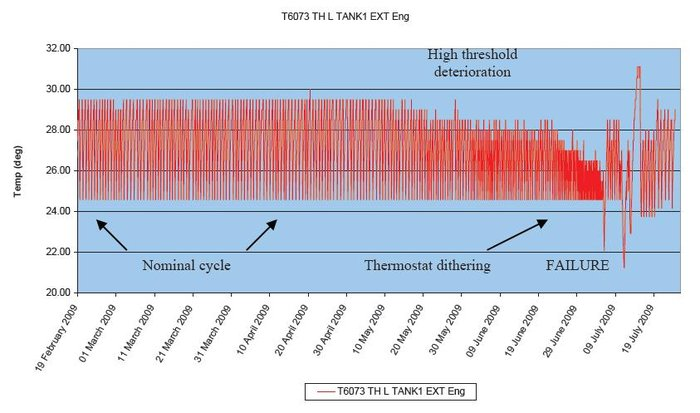

The most common unsupervised task is **clustering**. In this notebook, we will focus on the clustering and dimensionality reduction (in brief) tasks.

# 2. Clustering

**Partition** unlabeled examples into *disjoint subsets of clusters*, such that:

+ Examples within a cluster are similar (*high intra-class* similarity).
+ Examples in different clusters are different (*low inter-class* similarity).

It can help in discovering new categories in an unsupervised manner (no sample category labels provided).

## 2.1 Important questions in clustering

+ What is a *natural grouping* among these objects? 
    + Definition of "groupness"
    + Definition of "similarity/distance"

+ *How to group* samples?

+ *How many* clusters?
    + Fixed a priori?
    + Completely data driven?
    + Avoid “trivial” clusters - too large or small...
    + Which methods do work when the number of samples is huge?
    + Which methods do work when the number of classes is huge?, etc.

+ *What* is a *good grouping*? 
    + What objective measures can be defined to evaluate the quality of the clusters?

+ In which space to *group*? 
    + What to do in high-dimensional feature spaces?
 

<div class="alert alert-info"> 
*** IMPORTANT IDEA: Clustering is subjective issue.
</div>

Clustering will help us to analyze and get insight of the data, but the quality of the partition **depends on the application and the analyst**.

## 2.2 Similarity and distance

The notion of similarity is a tough one, however we can use the notion of distance as a surrogate.

The most wide spread distance metric is the Minkowski distance:

$$d(a,b) = \big(\sum\limits_{i=1}^d |a_i-b_i|^p \big)^{1/p}$$

The most well-known instantiations of this metric are: 

+ $p = 2$ we have Euclidean distance, 
+ $p=1$ Manhattan distance, and 
+ $p=\infty$ max-distance.

<center><img src="images/L1-norm-and-L2-norm-distance.png">
    
**Note** that the path with min L2 norm is unique, but it is not true for L1-norm!


## 2.3 What is a good clustering? Defining metrics to measure clustering quality

The **Rand index** or **Rand measure** (named after William M. Rand) in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the **adjusted Rand index**. From a mathematical standpoint, Rand index is related to the accuracy, but is applicable even when class labels are not used.

Given a set of n elements $S = \{o_1, \ldots, o_n\}$ and two partitions of S to compare, $X = \{X_1, \ldots, X_r\}$, a partition of $S$ into $r$ subsets, and $Y = \{Y_1, \ldots, Y_s\}$, a partition of $S$ into $s$ subsets, define the following:

+ a, the number of pairs of elements in S that are in the same set in X and in the same set in Y
+ b, the number of pairs of elements in S that are in different sets in X and in different sets in Y
+ c, the number of pairs of elements in S that are in the same set in X and in different sets in Y
+ d, the number of pairs of elements in S that are in different sets in X and in the same set in Y.

**Definition**: The Rand index, R, is:
$ R = \frac{a+b}{a+b+c+d} = \frac{a+b}{{n \choose 2 }}$




#### 2.3.1 Compute the **homogeneity, completeness and V-Measure scores**###

A clustering result satisfies **homogeneity** if all of its clusters contain only data points which are members of the same original (a single) class.

A clustering result satisfies **completeness** if all the data points that are members of a given class are elements of the same automatic cluster.

Both scores have positive values between 0.0 and 1.0, larger values being desirable.

In [5]:
from sklearn import metrics

metrics.homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [6]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))

1.000


In [7]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

1.000


In [8]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.000


In [9]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


In [10]:
print(metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0


In [11]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))

1.0


In [12]:
print(metrics.completeness_score([0, 1, 2, 3], [0, 0, 1, 1]))

0.9999999999999999


In [13]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.0


In [14]:
print(metrics.completeness_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.0


#### 2.3.2 V-measure

**V-measure** cluster labeling given a ground truth:
The V-measure is the *harmonic mean* between homogeneity and completeness:

  $v = 2 * (homogeneity * completeness) / (homogeneity + completeness)$

Is the  metric dependent of the absolute values of the labels?: will a permutation of the class or cluster label values change the score value in any way?

Is the metric symmetric wrt the switching label_true with label_pred?

This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

Perfect labelings are both homogeneous and complete, hence have score 1.0:

In [139]:
print(metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 1]))

print (metrics.v_measure_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0
1.0


**Question:** Labelings that **assign all classes members to the same clusters** are: ______________, but not __________:

In [140]:
print("%.3f" % metrics.completeness_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.homogeneity_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 2], [0, 0, 1, 1]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 1, 1]))

1.000
0.000
0.000
0.800
0.667


Labelings that have **pure clusters with members coming from the same classes** are _____________ but un-necessary splits harm ____________ and thus penalize V-measure as well:

In [141]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 2]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 1, 2, 3]))

0.800
0.667


If classes members are **completely split across different clusters**, the assignment is totally incomplete, hence the V-Measure is null:

In [142]:
print("%.3f" % metrics.v_measure_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.000


Clusters that include samples from **totally different classes** totally destroy the ____________ of the labeling, hence:

In [143]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


#### 2.3.3 Summary
**Advantages**

+ *Bounded scores*: 0.0 is as bad as it can be, 1.0 is a perfect score.

+ *Intuitive interpretation*: clustering with bad V-measure can be qualitatively analyzed in terms of homogeneity and completeness to better feel what ‘kind’ of mistakes is done by the assignment.

+ *No assumption* is made on the cluster structure: can be used to compare clustering algorithms such as K-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks**

+ The previously introduced metrics are **not normalized with regards to random labeling**: this means that depending on the number of samples, clusters and ground truth classes, a completely random labeling will not always yield the same values for homogeneity, completeness and hence V-measure. In particular random labeling won’t yield zero scores especially when the number of clusters is large.

+ This problem can safely be ignored when **the number of samples** is high i.e. more than a thousand and the number of clusters is less than 10. 

+ These metrics require the **knowledge of the ground truth classes** while almost never available in practice or require manual assignment by human annotators (as in the supervised learning setting).

*What about when we do not have ground truth?*


####  2.3.4 Silhouette Coefficient

The **Silhouette Coefficient** is calculated using the *mean intra-cluster distance* (a) and the *mean nearest-cluster distance* (b) for each sample. The Silhouette Coefficient for a sample is:

                           (b - a) / max(a, b).

where b is the distance between a sample and the nearest cluster that the sample is not part of. Note that Silhouette Coefficent is only defined if number of labels is: $ 2 <= n_{labels} <= n_{samples} - 1$ (WHY?).

**Test:** 

+ The best value is _____.

+ The worst value is _____. 

+ Silhouette values near 0 indicate ________. 


**Advantages**

The score is bounded between -1 and +1. Scores around zero indicate ___________ clusters (WHY?).

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**Drawbacks**

The Silhouette Coefficient is generally higher for convex clusters. WHY?

#### 2.3.5 Adjusted Mutual Information (AMI)

**(OPTIONAL)** *Adjusted Mutual Information (AMI)* is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. For two clusterings U and V, the AMI is given as:

$ AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [max(H(U), H(V)) - E(MI(U, V))]$.

This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

This metric is furthermore symmetric: switching label_true with label_pred will return the same score value. This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

Be mindful that this function is an order of magnitude slower than other metrics, such as the Adjusted Rand Index.

**Advantages**

+ Random (uniform) label assignments have an AMI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Mutual Information or the V-measure for instance).

+ Bounded range [0, 1]: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, values of exactly 0 indicate purely independent label assignments and a AMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).

+ No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks**

+ Contrary to inertia, MI-based measures require the knowledge of the ground truth classes while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

However MI-based measures can also be useful in purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection.

+ NMI and MI are not adjusted against chance.

## 3 Clustering techniques: how to group samples?

<center><img src="images/clustering of genes.gif">
</center>
<center><small>(a) The data set contains four clusters of different sizes, shapes and numbers of genes. Left: each dot represents a gene, plotted against its expression value under the two experimental conditions. Euclidean distance, which corresponds to the straight-line distance between points in this graph, was used for clustering. Right: the standard red-green representation of the data and corresponding cluster identities. (b) Hierarchical clustering finds an entire hierarchy of clusters. The tree was cut at the level indicated to yield four clusters. Some of the superclusters and subclusters are illustrated on the left. (c) k-means (with k = 4) partitions the space into four subspaces, depending on which of the four cluster centroids (stars) is closest. (d) SOM finds clusters, which are organized into a grid structure (in this case a simple 2 times 2 grid).

From the following article:
How does gene expression clustering work?
Patrik D'haeseleer, [Nature Biotechnology 23, 1499 - 1501 (2005)](http://www.nature.com/nbt/journal/v23/n12/fig_tab/nbt1205-1499_F1.html)
doi:10.1038/nbt1205-1499
        </small></center>

### 3.1 Taxonomy of clustering algorithms:

There are two big families of clustering techniques:

+ *Partitional algorithms:* Start with a random partititon and refine it iteratively.
+ *Hierarchical algorithms:* Agglomerative (bottom-up), top-down.

**Partitional algorithms**

Partitional algorithms can be divided in two branches:

+ Hard partition algorithms, such as *K-means*, assign a unique cluster value to each element in the feature space.
+ Soft partition algorithms, such as *Mixture of Gaussians*, can be viewed as density estimators and assign a confidence or probability to each point in the space.

In order to build our intuition about clustering, we will start with the simplest, but one of the famest methods: K-means.

### 3.2 K-means algorithm

**Algorithm:**
1. Initialize the value  $K$ of desirable clusters.
2. Initialize the $K$ cluster centers, e.g. randomly.
3. Decide the class memberships of the N data samples by assigning them to the nearest cluster centroids (e.g. the center of gravity or mean).
4. Re-estimate the $K$ cluster centers, by assuming the memberships found above are correct.
5. If none of the N objects changed membership in the last iteration, exit. Otherwise go to 3.

Let us see this in action:

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1.2*np.random.randn(MAXN,2)])
X.shape

(120, 2)

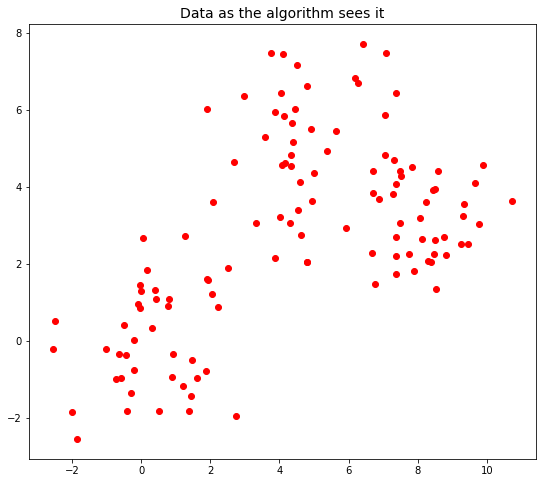

In [16]:
#Just for visualization purposes, create the labels of the three distributions
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as the algorithm sees it', size=14)
plt.gcf().set_size_inches((20,8))


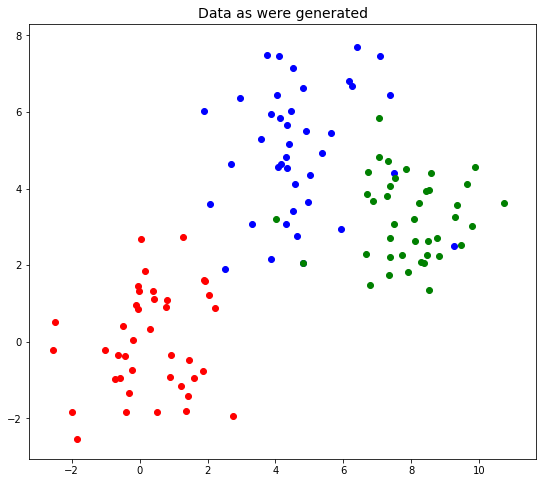

In [17]:
plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as were generated',size=14)
plt.gcf().set_size_inches((20,8))



In [19]:
from sklearn import cluster

K=3 # Assuming to be 3 clusters!

clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**Note**: Each clustering algorithm comes in two variants: a class, that implements the *fit* method to learn the clusters on train data, and a *predict* function, that, given test data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the *labels_* attribute.
    

In [25]:
print(clf.labels_[1:45])    # or
print(clf.predict(X)[1:45]) # equivalent

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2]


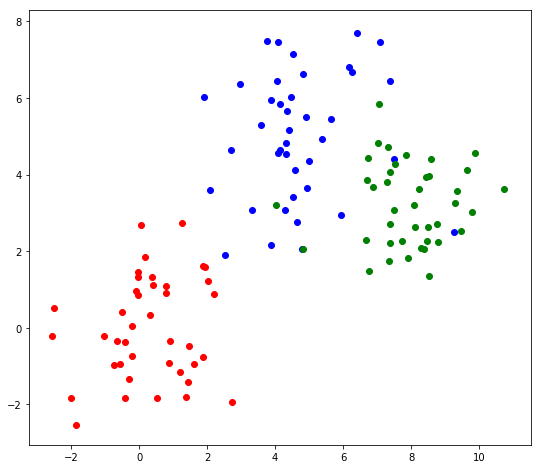

In [26]:
#Visualizing the data as generated
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((9,8))

In [30]:
#Let's visualize the kmeans clustering on the space:
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()] # c_ translates slice objects to concatenation along the second axis.
print(data)

[[-5.         -5.        ]
 [-4.89949749 -5.        ]
 [-4.79899497 -5.        ]
 ...
 [14.79899497 15.        ]
 [14.89949749 15.        ]
 [15.         15.        ]]


In [31]:
Z=clf.predict(data) # returns the labels of the data
print(Z[1:45])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### 3.2.1 **How many "misclusterings" do we have?**

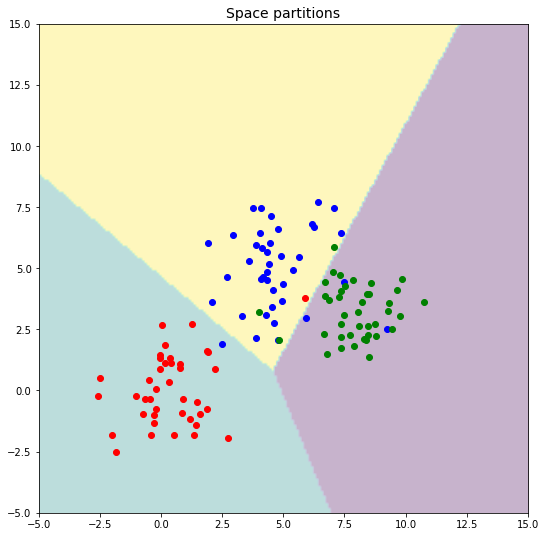

In [51]:
# Visualize space partition
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((9,9))

### 3.2.2 Implementing the kmeans
(OPTIONAL) Let's perform a hand-made step by step kmeans analysis:

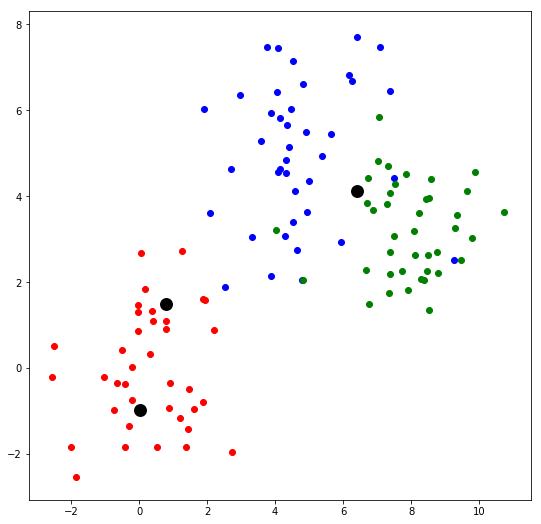

In [69]:
# Select centroids

from sklearn import cluster
from scipy.spatial.distance import cdist
K=3

#Select three centroids: for example, the first three elements of the data and visualize them by black circles
C=X[:3,:]

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2, zorder=10)

fig = plt.gcf()
fig.set_size_inches((9,9))

In [70]:
# Determine partition according to centroids
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean') 
                            #Computes distance between each pair of the two collections of inputs.
print(Y)

[[14.60503996  6.44933308  8.70266629]
 [14.52676287  6.37108805  8.63600329]
 [14.44876079  6.29347522  8.57000038]
 ...
 [13.73535665 21.75018355 19.45607942]
 [13.79707821 21.81850242 19.52851443]
 [13.85925371 21.88706953 19.60119709]]


In [72]:
#Which is the label of the closest point?
Z = np.argmin(Y,axis=1) 

In [73]:
print('Obtained labels: ', Z)
print(Z.reshape(sz))

Obtained labels:  [1 1 1 ... 0 0 0]
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]]


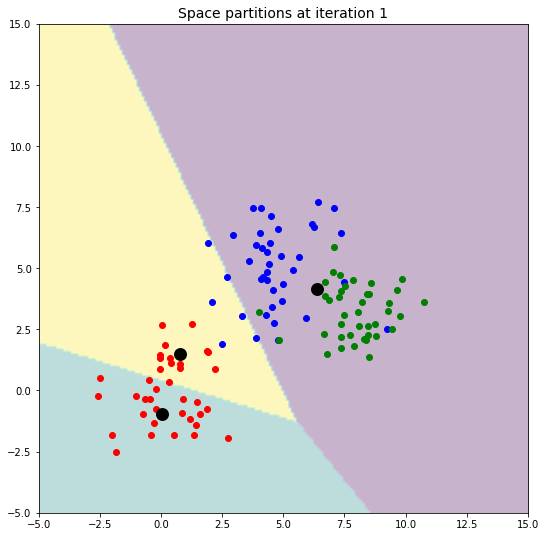

In [74]:
# Visualize
plt.title('Space partitions at iteration 1', size=14)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2)

fig = plt.gcf()
fig.set_size_inches((9,9))

In [75]:
#Compute membership for next iteration
Y = cdist(X, C, 'euclidean')
y_pred = np.argmin(Y,axis=1) #finds the minimum in each row, that is the closest center
print(y_pred[1:20])

[1 2 1 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1]


In [76]:
#Update centroids
for i in range(K):
    C[i,:]=np.mean(X[y_pred==i,:],axis=0)

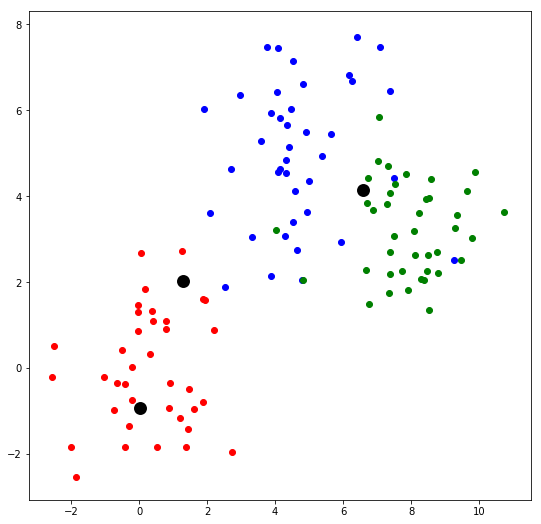

In [77]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black',linewidths=2,zorder=10)

fig = plt.gcf()
fig.set_size_inches((9,9))

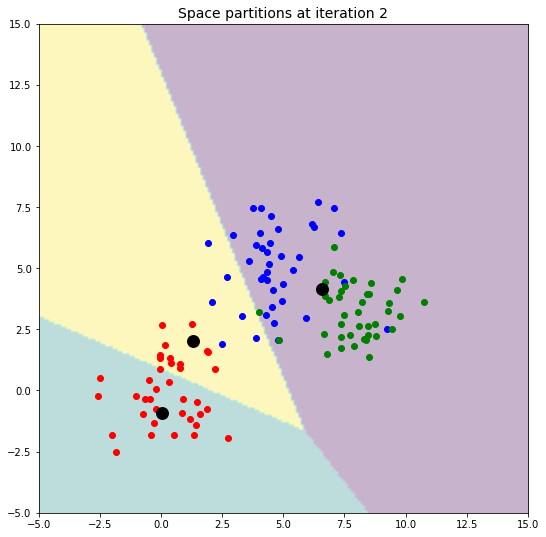

In [78]:
#And the new area of influence is
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r') # painting original labels with colors
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

#Painting seeds
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2,zorder=10)

#Painting the hyperplanes
x = np.linspace(-5,15,200) 
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1) # Determine to whom centroid each point is closest

#Visualize
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions at iteration 2', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

 This process is repeated until the centroids stabilize.

### 3.2.3 Comparing the results to the ground truth


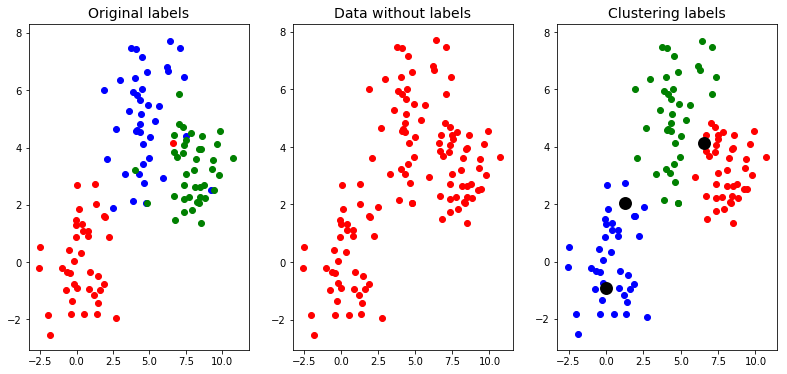

In [80]:

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0) #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
Zx=clf.predict(X)

plt.subplot(1,3,1)
plt.title('Original labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r') # r
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')  # g
fig = plt.gcf()
fig.set_size_inches((15,6))

plt.subplot(1,3,2)
plt.title('Data without labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')  # g
fig = plt.gcf()
fig.set_size_inches((15,6))

plt.subplot(1,3,3)
plt.title('Clustering labels', size=14)
plt.scatter(X[(Zx==1).ravel(),0],X[(Zx==1).ravel(),1],color='r')
plt.scatter(X[(Zx==2).ravel(),0],X[(Zx==2).ravel(),1],color='b')
plt.scatter(X[(Zx==0).ravel(),0],X[(Zx==0).ravel(),1],color='g')
#Painting seeds
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2,zorder=10)
fig = plt.gcf()
fig.set_size_inches((13.4,6))


### 3.2.4 Kmeans as a minimization procedure 

The K-means algorithm clusters data by trying to separate samples in $n$ groups of equal variance. In other words, the K-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean of the samples in the cluster. The means are commonly called the cluster **“centroids”**. 

      Shell the centroids belong to the original set of points?

The K-means algorithm aims to choose centroids minimizing a criterion known as the **inertia** <inertia> or **within-cluster** sum-of-squares:

  <center>
  Inertia=$\displaystyle\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_{i,j} - \mu_j||^2)$

**Inertia**, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. 

Several issues should be taken into account:

+ It is non-deterministic - depends on the **initialization**.
+ Inertia makes the **assumption** that clusters are **convex and isotropic** (WHY?), which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

+ Can the algorithm assures **converging** to the global minimum? - Given enough time, K-means will always converge.

+ This algorithm requires the **number of clusters to be specified**. 

+ It scales well to **large number of samples** and has been used across a large range of application areas in many different fields.






The computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization.

    

**Homework:** Apply the k-means to the Marathon data to detect which are the groups of countries with similar average time.

### 3.2.5 Evaluating kmeans

0.81


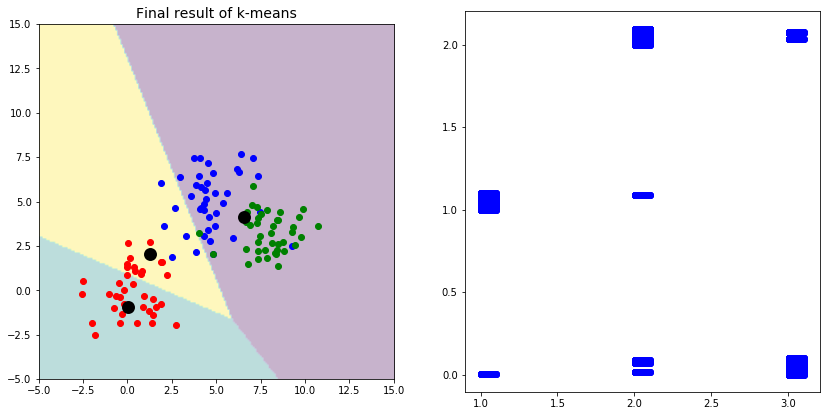

In [81]:
from sklearn import metrics

clf = cluster.KMeans(n_clusters=K, random_state=0) #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
    
plt.subplot(1,2,1)
plt.title('Final result of k-means', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
#Painting seeds
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2,zorder=10)

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)

plt.subplot(1,2,2)
plt.plot(y+0.1*np.random.rand(120),clf.labels_+0.1*np.random.rand(120), 'bo')

fig = plt.gcf()
fig.set_size_inches((14,7))

print ('%.2f' % metrics.adjusted_rand_score(y.ravel(), clf.labels_))

In [90]:
clf = cluster.KMeans(n_clusters=K, init='k-means++',  max_iter=300, n_init=10) 
                                        #initialize the k-means clustering
clf.fit(X)                              #run the k-means clustering
print('Final evaluation of the clustering:')
print('Inertia: %.2f' %  clf.inertia_)
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), clf.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y.ravel(), clf.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y.ravel(), clf.labels_))             
print('V_measure %.2f' %  metrics.v_measure_score(y.ravel(), clf.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, clf.labels_,  metric='euclidean'))

Final evaluation of the clustering:
Inertia: 380.17
Adjusted_rand_score 0.81
Homogeneity 0.77
Completeness 0.77
V_measure 0.77
Silhouette 0.53


In [91]:
clf1 = cluster.KMeans(n_clusters=K,  init='random',max_iter=2, n_init=2) 
                                    #initialize the k-means clustering
clf1.fit(X)                         #run the k-means clustering
print('Final evaluation of the clustering:')
print ('Inertia: %.2f' % clf1.inertia_)
print ('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), clf1.labels_))
print ('Homogeneity %.2f' % metrics.homogeneity_score(y.ravel(), clf1.labels_))
print ('Completeness %.2f' % metrics.completeness_score(y.ravel(), clf1.labels_))
print ('V_measure %.2f' % metrics.v_measure_score(y.ravel(), clf1.labels_))
print ('Silhouette %.2f' % metrics.silhouette_score(X, clf1.labels_, metric='euclidean'))

Final evaluation of the clustering:
Inertia: 400.64
Adjusted_rand_score 0.79
Homogeneity 0.74
Completeness 0.75
V_measure 0.75
Silhouette 0.53


**Notes:** Some seeds can result in poor convergence rate, or convergence to sub-optimal clusterings:
 
 #### 3.2.6 Kmeans summary
 
 + (+) Select good seeds using a heuristic (e.g. seeds with large distance among them).
 + (+) Try out multiple starting points. 
 + (+) Initialize with the results of another method.
 
 
 + (-) Tends to look for spherical clusters.
 + (-) Prone to local minima stabilization.

## 3.3 Hierarchical clustering

Another interesting clustering technique is hierarchical clustering. Hierarchical clustering is a general family of clustering algorithms that build nested clusters by *merging or splitting* them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the *leaves* being the clusters with only one sample. This is a nice tool, because of its interpretability. The result of the technique is a *tree* showing the similarity among the samples. *Partitioning* is computed by selecting a cut on that tree at a certain level. The tree is usually called **dendrogram**.


<center><img src="images/clustering of genes.gif" width="400">


### 3.3.1 Different hierarchical clusterings

**Bottom-Up agglomerative clustering sketch of algorithm**

+ Starts with each sample data in a separate cluster.
+ Then, repeatedly joins the closest pair of clusters.
+ Until there is only one cluster.

The history of merging forms a binary tree or hierarchy.

**Top-Down divisive clustering sketch of algorithm**

+ Starting with all the data in a single cluster.
+ Consider every possible way to divide the cluster into two. Choose the best division.
+ Recursively operate on both sides.

### 3.3.2 Agglomerative clustering

The **AgglomerativeClustering** performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. 

** Defining the similarity of two clusters:**

The linkage criterion determines the metric used for the merge strategy:

+ *Single* linkage works on the similarity of two most similar members. It can create chain effects, such as follow the nearest neighbor.

+ *Maximum* or *complete* linkage minimizes the maximum distance between observations of pairs of clusters. Based on the similarity of the two least similar members, it will give tight spherical clusters.

+ *Average* linkage averages similarity between members i.e. minimizes the average of the distances between all observations of pairs of clusters.

+ *Ward* minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

AgglomerativeClustering can also *scale to large number* of samples when it is used jointly with a *connectivity matrix*, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

<center>
<img src="images/plot_digits_linkage_002.png" height="50">
<img src="images/plot_digits_linkage_003.png" height="50">
<img src="images/plot_digits_linkage_001.png" height="50"> 
</center>

Agglomerative clustering has a ** “rich get richer” ** behavior that leads to *uneven cluster sizes*. In this regard, complete linkage is the worst strategy, and *Ward* gives the most regular sizes. 

However, the **affinity** cannot be varied with Ward, thus for non Euclidean metrics, *average linkage* is a good alternative.

### 3.3.3 **Adding connectivity constraints**

An interesting aspect of Agglomerative Clustering is that connectivity constraints can be added to this algorithm (only adjacent points/clusters can be merged together).

This is achieved through a connectivity matrix that defines for each sample the neighboring samples following a given structure of the data. 

- For instance, in the swiss-roll example below, the connectivity constraints forbid the merging of points that are not adjacent on the swiss roll, and thus avoid forming clusters that extend across overlapping folds of the roll.

<center>
<img src="images/plot_ward_structured_vs_unstructured_0011.png">
<img src="images/plot_ward_structured_vs_unstructured_0021.png"> 
</center>

These constraints are useful to impose a certain local structure, but they also make the algorithm faster, especially when the number of the samples is high. The connectivity constraints are imposed via a connectivity matrix: a scipy sparse matrix that has elements only at the intersection of a row and a column with indices of the dataset that should be connected.

This matrix can be constructed from a-priori information: for instance, you may wish to cluster web pages by only merging pages with a link pointing from one to another. It can also be learned from the data, for instance using sklearn.neighbors.kneighbors_graph to restrict merging to nearest neighbors as in this example, or using sklearn.feature_extraction.image.grid_to_graph to enable only merging of neighboring pixels on an image.


### 3.3.4 Illustration of connectivity effect

(OPTIONAL) [Agglomerative clustering with and without structure](http://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering.html#example-cluster-plot-agglomerative-clustering-py) 

This example shows the effect of imposing a connectivity graph to capture local structure in the data. The graph is simply the graph of 20 nearest neighbors.
Two consequences of imposing a connectivity can be seen. 

- First clustering with a connectivity matrix is much faster.

- Second, when using a connectivity matrix, average and complete linkage are unstable and tend to create a few clusters that grow very quickly. The connectivity graph breaks this mechanism. 

This effect is more pronounced for very sparse graphs (try decreasing the number of neighbors in kneighbors_graph) and with complete linkage.

- In particular, having a very small number of neighbors in the graph, imposes a geometry that is close to that of single linkage, which is well known to have this percolation instability.

In [94]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

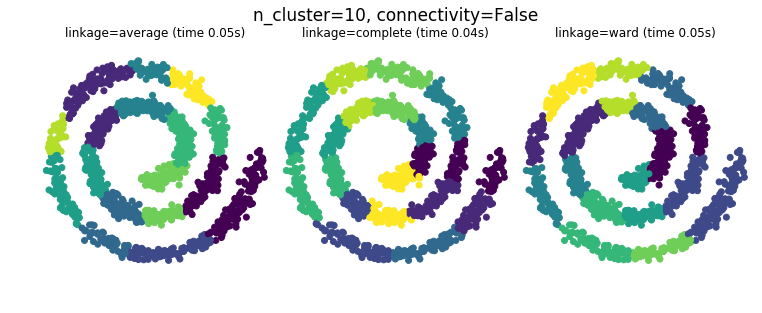

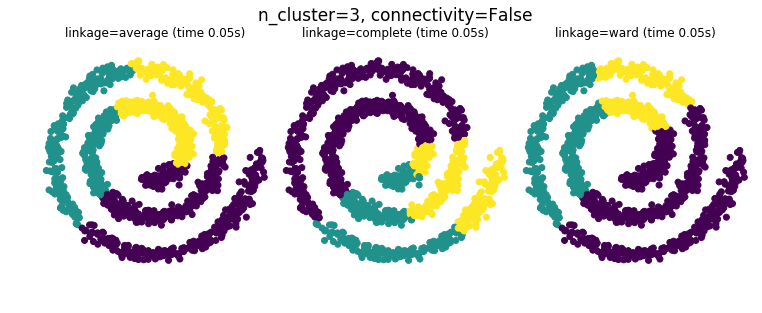

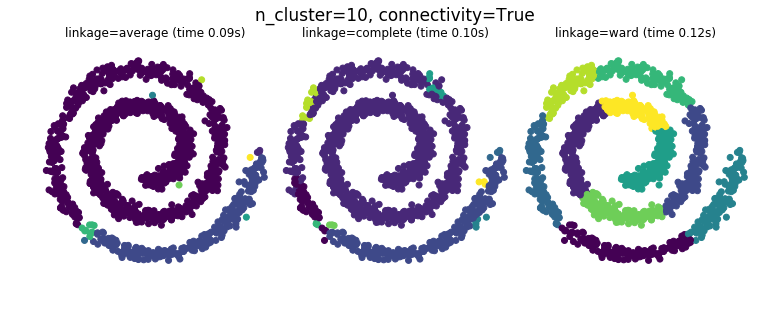

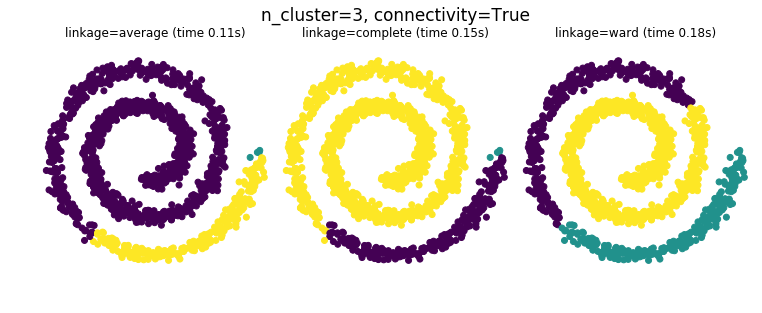

In [95]:
# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 15, include_self=True)

for connectivity in (None, knn_graph):
    for n_clusters in (10, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                                                          fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %(n_clusters, connectivity is not None), size=17)

plt.show()

## 3.4 Spectral clustering

Our last method in this notebook will be spectral clustering. In order to illustrate it, we will add some spice to our problem. But before it, let us check on the theoretical and algorithmic basis of the technique.

Up to this point, we have considered clustering as finding data groups following a notion of **compactness**. Another way of looking at what a cluster is, is given by the **connectivity** (or **similiarity**).

Let us check an example of the difference of both:

**Spectral clustering** refers to a family of methods that use spectral techniques. 

Specifically, these techniques are related to the *eigen-decomposition of an affinity or similarity* matrix.

They attempt to solve the problem of clustering according to *connectivity*.

Let us consider an ideal similarity matrix of two clear sets.

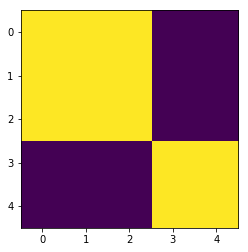

In [106]:
#Suppose an ideal similarity matrix
import numpy as np

S = np.array([[1,1,1,0,0],[1, 1,1, 0, 0],[1, 1,1, 0, 0],[0,0,0,1,1],[0,0,0,1,1]]) # connectivity matrix
plt.imshow(S,interpolation='nearest')

This matrix shows *how data is similar* to each other. We can clearly see two clusters. Let us now check the eigenvectors of this matrix.

Eigenvalues: 
 [ 3.00000000e+00  2.00000000e+00  6.16297582e-33  0.00000000e+00 -7.50963641e-17]

Eigenvectors: 
 [[ 5.77350269e-01  0.00000000e+00 -6.51147040e-17  0.00000000e+00  6.09781659e-01]
 [ 5.77350269e-01  0.00000000e+00 -7.07106781e-01  0.00000000e+00 -7.75129861e-01]
 [ 5.77350269e-01  0.00000000e+00  7.07106781e-01  0.00000000e+00  1.65348202e-01]
 [ 0.00000000e+00  7.07106781e-01  0.00000000e+00 -7.07106781e-01  0.00000000e+00]
 [ 0.00000000e+00  7.07106781e-01  0.00000000e+00  7.07106781e-01  0.00000000e+00]]


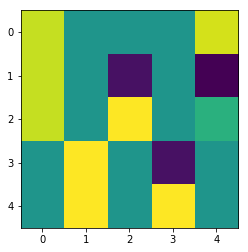

In [107]:
# Perform eigenvalue decomposition and show the eigenvectors in descending order
from scipy.linalg import eig
 
[eig_vals, eig_vecs] = eig(S)
 
sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print('Eigenvalues: \n', np.real(eig_vals[sorted_inds]))
print()
print('Eigenvectors: \n', eig_vecs[:,sorted_inds])
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')

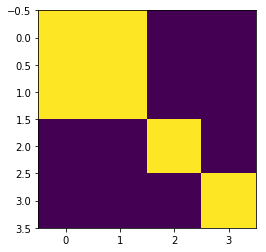

In [108]:
#Suppose an ideal similarity matrix
import numpy as np
 
S = np.array([[1,1,0,0],[1, 1, 0, 0],[0,0,1,0],[0,0,0,1]])
plt.imshow(S,interpolation='nearest')


[2. 1. 1. 0.]

[[ 0.70710678  0.          0.         -0.70710678]
 [ 0.70710678  0.          0.          0.70710678]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]]


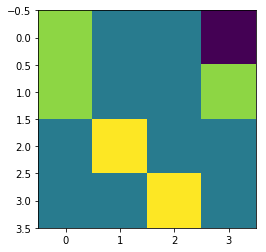

In [109]:
# Perform eigenvalue decomposition and show the eigenvectors in descending order
 
from scipy.linalg import eig
 
[eig_vals, eig_vecs] = eig(S)
sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print(np.real(eig_vals[sorted_inds]))
print()
print(eig_vecs[:,sorted_inds])
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')


Observe that in the ideal case the first eigenvector characterizes the first cluster and the second one - the second cluster. This observation can be generalized to k-eigenvectors for K clusters. Let us corrupt the matrix a little bit, and see what happens.

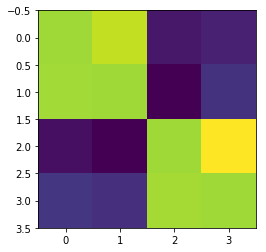

In [116]:
noise=0.2
S = np.array([[1,1,0,0],[1, 1, 0, 0],[0,0,1,1],[0,0,1,1]])
S2 = S+noise*np.random.rand(S.shape[0],S.shape[1])*(1-np.eye(4))

plt.imshow(S2,interpolation='nearest')


[ 2.26286056  1.86478149 -0.02447166 -0.10317039]

[[ 0.4552139   0.5101786   0.71531975  0.48496839]
 [ 0.44266353  0.50267655 -0.68609609 -0.51581284]
 [ 0.5363975  -0.54719295  0.08455954 -0.52233471]
 [ 0.55597394 -0.43314426 -0.10217385  0.47529909]]


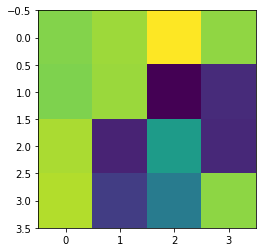

In [117]:
# Perform eigenvalue decomposition and show the eigenvectors in descending order
[eig_vals, eig_vecs] = eig(S2)

sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print(np.real(eig_vals[sorted_inds]))
 
print ()
 
print(np.real(eig_vecs[:,sorted_inds]))
 
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')


The result is not so nice, but let us look at the first two eigenvectors. Can we observe the clusters?


<div class="alert alert-success"> **EXERCISE:** Increase the value of the random noise and check the two first eigenvalues and eigenvectors. Can we partition the two clusters based on that information? (Recall that the maximum value in a similarity matrix is 1.)
</div>

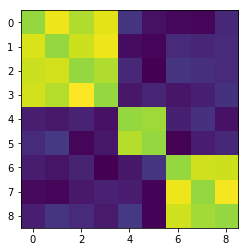

In [118]:
#Suppose an ideal similarity matrix
import numpy as np
 
S = np.array([[1,1,1,1,0,0,0,0,0],[1,1,1,1,0,0,0,0,0],[1,1,1,1,0,0,0,0,0],[1,1,1,1,0,0,0,0,0],[0,0,0,0,1,1,0,0,0],
              [0,0,0,0,1,1,0,0,0],[0,0,0,0,0,0,1,1,1],[0,0,0,0,0,0,1,1,1],[0,0,0,0,0,0,1,1,1]])
 
noise=0.2
S2 = S+noise*np.random.rand(S.shape[0],S.shape[1])*(1-np.eye(9))
plt.imshow(S2,interpolation='nearest')
 

Eigenvalues: 
 [ 4.47970643  3.1418267   1.97476869 -0.04155657 -0.07739977 -0.07739977 -0.10494876 -0.14749847 -0.14749847]

Eigenvectors: 
 [[-0.47592904 -0.20234864  0.00095697 -0.2049984  -0.17639583 -0.17639583 -0.66885081 -0.25594056
  -0.25594056]
 [-0.48325996 -0.16724762 -0.06634917  0.34152344  0.29594161  0.29594161  0.38879518 -0.11363496
  -0.11363496]
 [-0.47268642 -0.14525242 -0.04606135 -0.04964098  0.14760262  0.14760262  0.09167529 -0.15186451
  -0.15186451]
 [-0.48134668 -0.17429006 -0.01800935 -0.06285588 -0.25263449 -0.25263449  0.197738    0.52352897
   0.52352897]
 [-0.0927959   0.08826501  0.68505091 -0.36103409 -0.08335855 -0.08335855 -0.08077759 -0.00428882
  -0.00428882]
 [-0.09999569  0.06684634  0.70201364  0.39114095  0.10201423  0.10201423  0.06244602  0.03477548
   0.03477548]
 [-0.14198907  0.53890472 -0.07460522  0.58726329  0.47615062  0.47615062 -0.28564546  0.27503703
   0.27503703]
 [-0.13901143  0.55921463 -0.13067598 -0.42043881 -0.23928319 -0.23

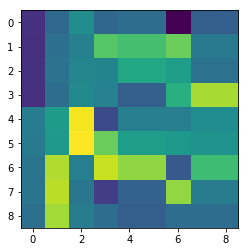

In [121]:
[eig_vals, eig_vecs] = eig(S2)
sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print('Eigenvalues: \n', np.real(eig_vals[sorted_inds]))
 
print ()
 
print('Eigenvectors: \n', np.real(eig_vecs[:,sorted_inds]))
 
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')

### 3.4.1 Setting the number of clusters

Let us look at the eigenvalues in ascending order.

[ 4.47970643+0.j          3.1418267 +0.j          1.97476869+0.j         -0.14749847+0.0896449j
 -0.14749847-0.0896449j  -0.07739977+0.08361814j -0.07739977-0.08361814j -0.10494876+0.j
 -0.04155657+0.j        ]


<BarContainer object of 9 artists>

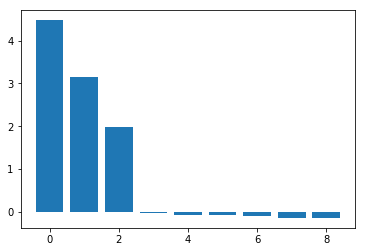

In [122]:
#Setting the clusters
# plt.bar(range(10), eig_vals.real[sorted_inds[0:10]])
print(eig_vals)
 
plt.bar(range(9), eig_vals.real[sorted_inds])

Observe that there are three which are very different from zero. In particular, a good heuristic for checking how many clusters there are is precisely counting the number of different from zero eigenvalues. In this problem, this value is precisely three clusters.

### 3.4.2 Handling multiple clusters
What if we have multiple clusters? Actually, for $K$ clusters we have to check for the corresponding eigenvectors. The usual way of handling this situation is to use a K-means on the  eigenvectors of interest.

In [123]:
from sklearn.cluster import KMeans

K=3
clf = KMeans(n_clusters=K,init='k-means++')

In [124]:
print('Eigenvectors:\n', np.real(eig_vecs[:,sorted_inds[0:K]]))
print() 
    
print('Eigenvalues:\n', np.real(eig_vals))

Eigenvectors:
 [[-0.47592904 -0.20234864  0.00095697]
 [-0.48325996 -0.16724762 -0.06634917]
 [-0.47268642 -0.14525242 -0.04606135]
 [-0.48134668 -0.17429006 -0.01800935]
 [-0.0927959   0.08826501  0.68505091]
 [-0.09999569  0.06684634  0.70201364]
 [-0.14198907  0.53890472 -0.07460522]
 [-0.13901143  0.55921463 -0.13067598]
 [-0.16349002  0.51401316 -0.09160153]]

Eigenvalues:
 [ 4.47970643  3.1418267   1.97476869 -0.14749847 -0.14749847 -0.07739977 -0.07739977 -0.10494876 -0.04155657]


In [126]:
clf.fit(np.real(eig_vecs[:,sorted_inds[0:K]]))
y_pred=clf.predict(np.real(eig_vecs[:,sorted_inds[0:K]]))
print(y_pred)
 

[0 0 0 0 2 2 1 1 1]


The former code is now general for any number of clusters.

### 3.5 Comparing different clustering algorithms on toy datasets

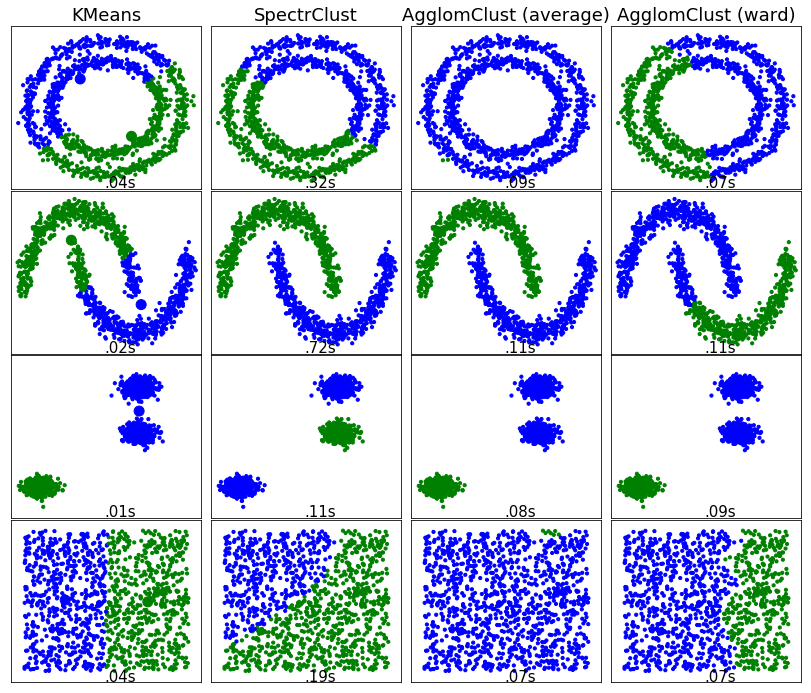

In [139]:
from sklearn import cluster, datasets
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1200
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.7,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.07)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

plt.figure(figsize=(11, 9.5))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, dataset in enumerate([noisy_circles, noisy_moons, blobs, no_structure]):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=True)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    # connectivity=None

    # Compute distances
    distances = euclidean_distances(X)

    # create clustering estimators
    means = cluster.KMeans(n_clusters=2)
    spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',
                                                  affinity="nearest_neighbors")
    average_linkage = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock", 
                                                  n_clusters=2, connectivity=connectivity)
    ward = cluster.AgglomerativeClustering(n_clusters=2,
                                                  linkage='ward', connectivity=connectivity)

    for name, algorithm in [
                            ('KMeans', means),
                            ('SpectrClust', spectral),
                            ('AgglomClust (average)', average_linkage),
                            ('AgglomClust (ward)', ward)
                           ]:
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, 4, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            
        #visualize results    
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.66, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

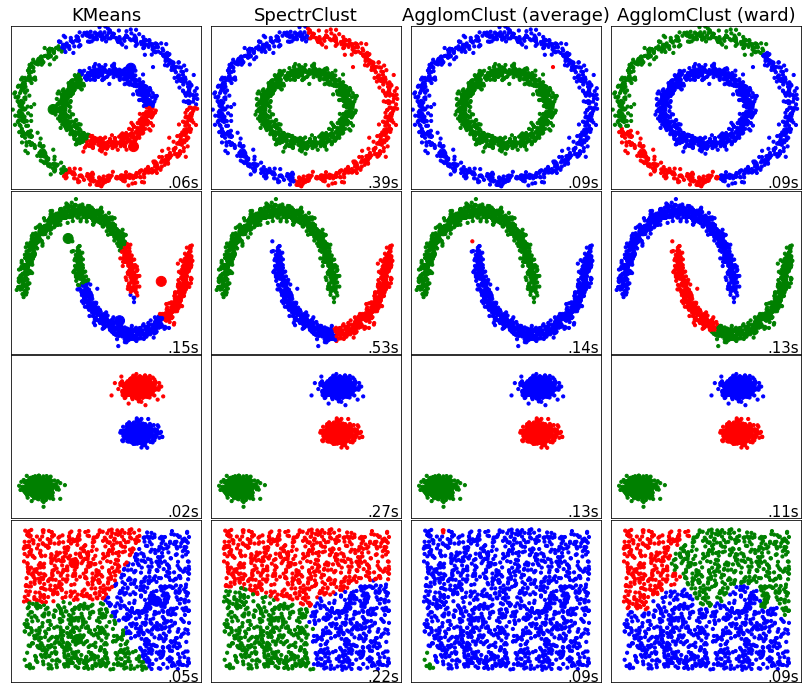

In [79]:
plt.figure(figsize=(11, 9.5))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)
plot_num = 1

for i_dataset, dataset in enumerate([noisy_circles, noisy_moons, blobs,
                                     no_structure]):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)


    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=True)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # Compute distances
    distances = euclidean_distances(X)

    # create clustering estimators
 
    means = cluster.KMeans(n_clusters=3)
    spectral = cluster.SpectralClustering(n_clusters=3,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    average_linkage = cluster.AgglomerativeClustering(linkage="average",
                            affinity="cityblock", n_clusters=3,
                            connectivity=connectivity)
    ward = cluster.AgglomerativeClustering(n_clusters=3,
                    linkage='ward', connectivity=connectivity)

    for name, algorithm in [
                            ('KMeans', means),
                            ('SpectrClust', spectral),
                            ('AgglomClust (average)', average_linkage),
                            ('AgglomClust (ward)', ward)
                           ]:
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, 4, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()


### What happen if connectivity is set to None?

## 3.6 Summary table

In the following adapted table from sklearn documentation, we may check several methods for clustering, their corresponding parameters, scalability, their use and the notions of similarity they use as well as the input data format needed.

<table border="1">
<colgroup>
<col width="12.5%" />
<col width="12.5%" />
<col width="20%" />
<col width="20%" />
<col width="20%" />
<col width="15%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Method name</th>
<th class="head">Parameters</th>
<th class="head">Scalability</th>
<th class="head">Use</th>
<th class="head">Metric</th>
<th class="head">Input</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><em>K-Means</em></td>
<td>number of clusters</td>
<td>Very large <cite>n_samples</cite>, medium <cite>n_clusters</cite></td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
<td>Data samples</td>
</tr>
<tr class="row-odd"><td><em>Spectral clustering</em></td>
<td>number of clusters</td>
<td>Medium <cite>n_samples</cite>, small <cite>n_clusters</cite></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
<td>Affinity/distance matrix</td>
</tr>
<tr class="row-even"><td><em>Hierarchical clustering</em></td>
<td>number of clusters/ threshold</td>
<td>Large <cite>n_samples</cite> and <cite>n_clusters</cite></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
<td>Data samples</td>
</tr>
</tbody>
</table>
